In [1]:
#Read and Plot Results

In [2]:
import csv
import numpy as np
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import statistics

In [3]:
import os
import glob
os.chdir("LSH_Results")

In [4]:
#Use glob to match the pattern ‘csv’
extension='csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [5]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv("all_results.csv", index=False, encoding='utf-8-sig')

/Users/rsong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [6]:
#Delete previous file
# %%time
data = pd.read_csv('all_results.csv')

In [7]:
data.shape
#shoude be (467,5)

(467, 5)

In [8]:
data.head(467)

,Acc,BucketLength,NumHashTables,Unnamed: 0,Unnamed: 0.1
0,0.4552,20.0,81,55,NaN
1,0.4528,14.0,121,41,NaN
2,0.4524,2.0,81,1,NaN
3,0.4468,4.0,121,11,NaN
4,0.4450,4.0,111,10,NaN
...,...,...,...,...,...
462,0.4206,4.0,61,5,NaN
463,0.4194,12.0,51,16,NaN
464,0.4170,6.0,41,6,NaN
465,0.4170,10.0,51,13,NaN


In [9]:
data.sort_values(by='Acc', ascending=False)

,Acc,BucketLength,NumHashTables,Unnamed: 0,Unnamed: 0.1
60,0.4678,70.0,71,12,0.0
437,0.4666,8.0,51,10,NaN
61,0.4592,90.0,61,0,6.0
267,0.4580,1.0,51,14,NaN
62,0.4572,110.0,91,0,9.0
...,...,...,...,...,...
263,0.3956,40.0,20,54,NaN
296,0.3950,1.4,41,19,NaN
264,0.3940,45.0,1,65,NaN
265,0.3926,20.0,1,0,NaN


In [10]:
#Top Acc with parameters
data.sort_values(by='Acc', ascending=False).head(20)

,Acc,BucketLength,NumHashTables,Unnamed: 0,Unnamed: 0.1
60,0.4678,70.0,71,12,0.0
437,0.4666,8.0,51,10,NaN
61,0.4592,90.0,61,0,6.0
267,0.4580,1.0,51,14,NaN
62,0.4572,110.0,91,0,9.0
327,0.4564,1.8,11,25,NaN
0,0.4552,20.0,81,55,NaN
357,0.4552,0.6,100,9,NaN
63,0.4548,110.0,61,1,6.0
64,0.4540,120.0,11,0,1.0


In [11]:
BucketLength = list(data['BucketLength'])
NumHushTables = list(data['NumHashTables'])
Acc = list(data['Acc'])

In [12]:
print(BucketLength)
print(NumHushTables)
print(Acc)

[20.0, 14.0, 2.0, 4.0, 4.0, 2.0, 14.0, 14.0, 20.0, 18.0, 6.0, 8.0, 10.0, 20.0, 6.0, 10.0, 6.0, 12.0, 16.0, 6.0, 16.0, 16.0, 12.0, 8.0, 18.0, 8.0, 2.0, 4.0, 10.0, 14.0, 20.0, 16.0, 12.0, 2.0, 10.0, 18.0, 18.0, 4.0, 2.0, 8.0, 12.0, 12.0, 10.0, 20.0, 12.0, 6.0, 8.0, 16.0, 14.0, 18.0, 20.0, 10.0, 8.0, 6.0, 16.0, 4.0, 4.0, 18.0, 14.0, 2.0, 70.0, 90.0, 110.0, 110.0, 120.0, 100.0, 70.0, 80.0, 80.0, 70.0, 70.0, 110.0, 60.0, 80.0, 110.0, 80.0, 90.0, 110.0, 120.0, 120.0, 100.0, 60.0, 70.0, 120.0, 60.0, 90.0, 60.0, 100.0, 110.0, 60.0, 70.0, 110.0, 60.0, 80.0, 100.0, 60.0, 70.0, 120.0, 100.0, 80.0, 90.0, 100.0, 80.0, 120.0, 80.0, 110.0, 80.0, 100.0, 70.0, 90.0, 70.0, 100.0, 110.0, 60.0, 80.0, 90.0, 90.0, 100.0, 80.0, 90.0, 120.0, 100.0, 100.0, 70.0, 60.0, 90.0, 60.0, 90.0, 110.0, 120.0, 100.0, 80.0, 120.0, 110.0, 70.0, 90.0, 120.0, 100.0, 120.0, 60.0, 120.0, 110.0, 80.0, 120.0, 70.0, 110.0, 90.0, 60.0, 70.0, 90.0, 55.0, 55.0, 25.0, 50.0, 55.0, 40.0, 45.0, 50.0, 55.0, 50.0, 25.0, 55.0, 60.0, 55.0, 

Text(0.5, 0, 'Acc')

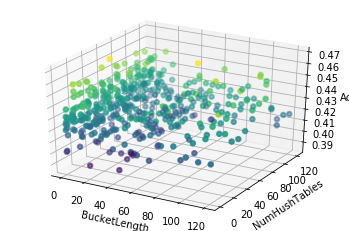

In [13]:
ax = plt.axes(projection='3d')
ax.scatter(BucketLength, NumHushTables, Acc, c=Acc, cmap='viridis', linewidth=2)
ax.set_xlabel('BucketLength')
ax.set_ylabel('NumHushTables')
ax.set_zlabel('Acc')

Text(0.5, 0, 'Acc')

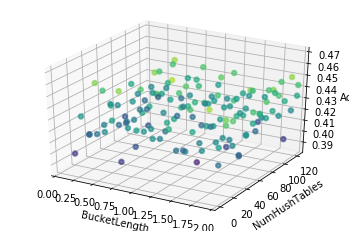

In [14]:
ax = plt.axes(projection='3d')
ax.scatter(BucketLength, NumHushTables, Acc, c=Acc, cmap='viridis', linewidth=2)
plt.xlim((0,2))
ax.set_xlabel('BucketLength')
ax.set_ylabel('NumHushTables')
ax.set_zlabel('Acc')

Text(0.5, 0, 'Acc')

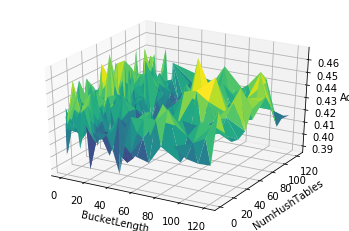

In [15]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(BucketLength, NumHushTables, Acc, cmap='viridis', edgecolor='none');
ax.set_xlabel('BucketLength')
ax.set_ylabel('NumHushTables')
ax.set_zlabel('Acc')

Text(0, 0.5, 'Acc')

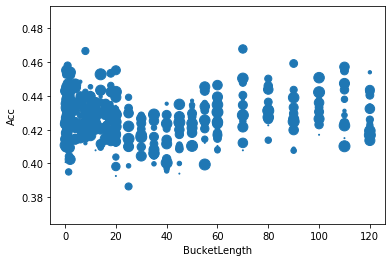

In [16]:
matplotlib.pyplot.scatter(BucketLength, Acc, NumHushTables)
plt.xlabel('BucketLength')
plt.ylabel('Acc')

Text(0, 0.5, 'Acc')

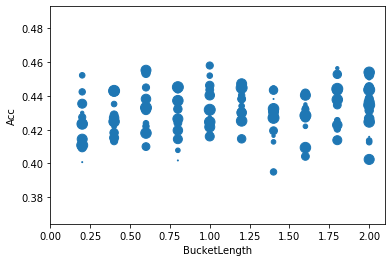

In [17]:
matplotlib.pyplot.scatter(BucketLength, Acc, NumHushTables)
plt.xlim((0,2.1))
plt.xlabel('BucketLength')
plt.ylabel('Acc')

Text(0, 0.5, 'Acc')

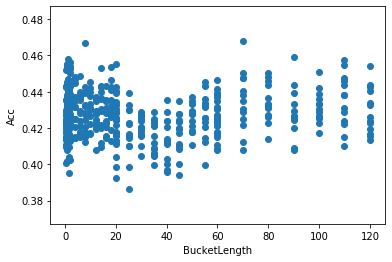

In [18]:
matplotlib.pyplot.scatter(BucketLength, Acc)
plt.xlabel('BucketLength')
plt.ylabel('Acc')

Text(0, 0.5, 'Acc')

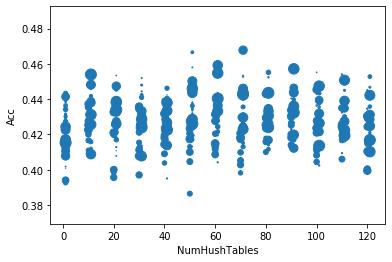

In [19]:
matplotlib.pyplot.scatter(NumHushTables, Acc, BucketLength)
plt.xlabel('NumHushTables')
plt.ylabel('Acc')

Text(0, 0.5, 'Acc')

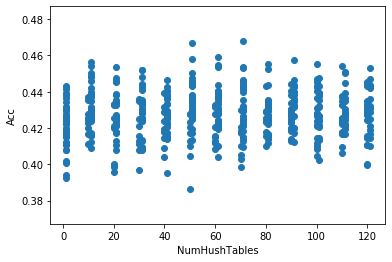

In [20]:
matplotlib.pyplot.scatter(NumHushTables, Acc)
plt.xlabel('NumHushTables')
plt.ylabel('Acc')

In [21]:
# # Data
# # linestyles = ['-', '--', '-.', ':']
# plt.plot( BucketLength, Acc, marker='', color='blue', linestyle='-', linewidth=1, label='line1')
# plt.xlabel('BucketLength')
# plt.ylabel('Acc')
# plt.legend()

In [22]:
statistics.mean(Acc)

0.42759828693790075

In [23]:
res = []
for i in list(data['Acc']):
    if i > 0.45:
        res.append(i)
print(res)

[0.4551999999999995, 0.4527999999999992, 0.45239999999999897, 0.4677999999999998, 0.4591999999999993, 0.4571999999999992, 0.4547999999999998, 0.4539999999999995, 0.4507999999999994, 0.4503999999999994, 0.4501999999999995, 0.4579999999999992, 0.4521999999999994, 0.4519999999999998, 0.453399999999999, 0.4527999999999995, 0.4563999999999992, 0.4533999999999998, 0.4551999999999994, 0.4539999999999994, 0.4503999999999996, 0.466599999999999, 0.4533999999999994]


In [24]:
statistics.mean(res)

0.4548956521739124

In [25]:
res2 = []
for i in range (467):
    if data['BucketLength'][i] >11 and data['BucketLength'][i] < 18:
#        print(i, data['BucketLength'][i], data['Acc'][i])
        res2.append(data['Acc'][i])

In [26]:
#res2

In [27]:
statistics.mean(res2)

0.42804102564102486

In [28]:
len(res2)

39

In [29]:
res3 = []
for i in range (467):
    if data['NumHashTables'][i] >50 and data['NumHashTables'][i] < 90:
        print(i, data['NumHashTables'][i], data['Acc'][i])
        res3.append(data['Acc'][i])

0 81 0.4551999999999995
2 81 0.45239999999999897
7 71 0.4427999999999991
10 71 0.4399999999999991
18 71 0.4355999999999992
21 81 0.4347999999999988
23 81 0.4323999999999989
26 71 0.43139999999999934
30 71 0.4301999999999991
34 71 0.42639999999999945
35 81 0.4263999999999989
37 71 0.42479999999999946
40 81 0.42419999999999897
42 81 0.4223999999999995
44 71 0.4209999999999993
52 71 0.4151999999999991
53 81 0.4147999999999988
56 81 0.41419999999999935
57 71 0.4129999999999996
58 81 0.4115999999999992
60 71 0.4677999999999998
61 61 0.4591999999999993
63 61 0.4547999999999998
67 51 0.4501999999999995
69 51 0.4477999999999995
73 71 0.4459999999999994
74 51 0.4459999999999992
76 51 0.4435999999999991
77 71 0.4435999999999991
78 81 0.4435999999999989
79 71 0.4425999999999991
82 61 0.4403999999999992
83 61 0.4403999999999987
92 61 0.4369999999999992
93 61 0.4363999999999987
96 81 0.4345999999999993
100 81 0.43319999999999903
101 61 0.433199999999999
107 81 0.4305999999999993
109 71 0.4295999999

In [30]:
statistics.mean(res3)

0.42974370370370296

In [31]:
data['BucketLength']

0      20.0
1      14.0
2       2.0
3       4.0
4       4.0
       ... 
462     4.0
463    12.0
464     6.0
465    10.0
466     4.0
Name: BucketLength, Length: 467, dtype: float64

In [32]:
res4 = []
acc_score = []
for i in range (467):
    if data['NumHashTables'][i] >40 and data['NumHashTables'][i] < 60:
#        print(i, data['NumHashTables'][i], data['Acc'][i])
        res4.append(data['Acc'][i])
acc_score.append(statistics.mean(res4))

In [33]:
acc_score

[0.42931746031745954]

In [34]:
#res4

In [35]:
np.unique(NumHushTables)

array([  1,  10,  11,  20,  21,  30,  31,  40,  41,  50,  51,  60,  61,
        70,  71,  80,  81,  90,  91, 100, 101, 110, 111, 120, 121])

In [36]:
#Mean Accuracy with different number of Hash Tables
acc_score1 = []
for k1 in np.unique(NumHushTables):
    res5 = []
    for i in range (467):
        if data['NumHashTables'][i] == k1:
            print(i, data['NumHashTables'][i], data['Acc'][i])
            res5.append(data['Acc'][i])
    acc_score1.append(statistics.mean(res5))
acc_score1

81 1 0.44139999999999896
127 1 0.4243999999999994
131 1 0.42259999999999937
137 1 0.4169999999999995
140 1 0.4153999999999991
141 1 0.4149999999999991
148 1 0.4077999999999996
197 1 0.4229999999999992
198 1 0.4225999999999997
213 1 0.4181999999999992
217 1 0.4175999999999989
234 1 0.4121999999999989
237 1 0.4113999999999988
241 1 0.41039999999999904
264 1 0.39399999999999896
265 1 0.3925999999999992
330 1 0.4381999999999993
333 1 0.43179999999999935
335 1 0.4307999999999991
339 1 0.4273999999999991
341 1 0.4253999999999995
344 1 0.4251999999999991
347 1 0.4219999999999989
349 1 0.4201999999999991
355 1 0.4017999999999993
356 1 0.4007999999999992
402 1 0.4433999999999991
407 1 0.43939999999999935
409 1 0.4363999999999996
411 1 0.4341999999999989
413 1 0.4315999999999994
415 1 0.43019999999999897
416 1 0.4295999999999992
420 1 0.42739999999999934
432 1 0.4157999999999992
436 1 0.4077999999999989
153 10 0.43719999999999903
155 10 0.4353999999999992
175 10 0.4275999999999995
181 10 0.42539

[0.4212499999999992,
 0.42444444444444374,
 0.4326962962962956,
 0.4139999999999991,
 0.42794814814814747,
 0.41786666666666583,
 0.4297407407407399,
 0.4208888888888882,
 0.4273555555555548,
 0.41451111111111033,
 0.436214814814814,
 0.4195333333333326,
 0.4320148148148141,
 0.4133333333333325,
 0.4338740740740734,
 0.424177777777777,
 0.42759999999999915,
 0.42697894736842035,
 0.4336823529411757,
 0.4283684210526309,
 0.4282117647058817,
 0.4257157894736835,
 0.4307294117647051,
 0.42610526315789404,
 0.4307999999999992]

Text(0, 0.5, 'Acc')

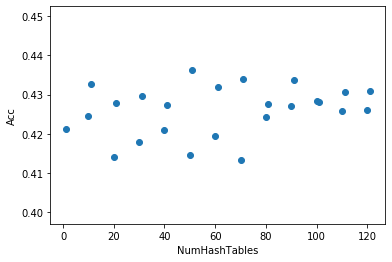

In [46]:
#Mean Accuracy with different number of Hash Tables
matplotlib.pyplot.scatter(np.unique(NumHushTables), acc_score1)
plt.xlabel('NumHashTables')
plt.ylabel('Acc')

In [38]:
np.unique(BucketLength)

array([  0.2,   0.4,   0.6,   0.8,   1. ,   1.2,   1.4,   1.6,   1.8,
         2. ,   4. ,   6. ,   8. ,  10. ,  12. ,  14. ,  16. ,  18. ,
        20. ,  25. ,  30. ,  35. ,  40. ,  45. ,  50. ,  55. ,  60. ,
        70. ,  80. ,  90. , 100. , 110. , 120. ])

In [39]:
#Mean Accuracy with different BucketLength
acc_score2 = []
for k2 in np.unique(BucketLength):
    res6 = []
    for i in range (467):
        if data['BucketLength'][i] == k2:
            print(i, data['BucketLength'][i], data['Acc'][i])
            res6.append(data['Acc'][i])
    acc_score2.append(statistics.mean(res6))
acc_score2

268 0.2 0.4521999999999994
275 0.2 0.4423999999999992
287 0.2 0.4273999999999992
306 0.2 0.43539999999999934
316 0.2 0.4229999999999995
325 0.2 0.4093999999999991
336 0.2 0.4299999999999996
353 0.2 0.4107999999999994
356 0.2 0.4007999999999992
388 0.2 0.4235999999999992
389 0.2 0.4233999999999997
394 0.2 0.4143999999999996
395 0.2 0.4107999999999989
280 0.4 0.4351999999999991
293 0.4 0.4147999999999992
295 0.4 0.4131999999999994
313 0.4 0.4287999999999996
318 0.4 0.4181999999999991
320 0.4 0.4151999999999991
348 0.4 0.4217999999999998
349 0.4 0.4201999999999991
350 0.4 0.4171999999999992
365 0.4 0.4429999999999992
366 0.4 0.4427999999999995
383 0.4 0.4269999999999992
386 0.4 0.42479999999999946
270 0.6000000000000001 0.4449999999999993
289 0.6000000000000001 0.4237999999999989
290 0.6000000000000001 0.4219999999999993
297 0.6000000000000001 0.453399999999999
310 0.6000000000000001 0.4315999999999994
324 0.6000000000000001 0.4099999999999993
328 0.6000000000000001 0.4533999999999998
334

[0.42335384615384547,
 0.4247846153846147,
 0.4338769230769224,
 0.4269692307692301,
 0.4335846153846148,
 0.4329538461538454,
 0.42773846153846073,
 0.42715384615384544,
 0.43384615384615305,
 0.4337769230769223,
 0.4298769230769224,
 0.4297999999999992,
 0.43066153846153765,
 0.4308923076923069,
 0.42575384615384526,
 0.4303538461538454,
 0.4280153846153839,
 0.4321692307692301,
 0.42268461538461455,
 0.41752307692307616,
 0.41975384615384526,
 0.4140615384615377,
 0.4136923076923069,
 0.4168153846153838,
 0.4243999999999992,
 0.4263846153846147,
 0.42622399999999927,
 0.43476923076923013,
 0.434123076923076,
 0.42839999999999917,
 0.4316307692307686,
 0.4351230769230761,
 0.42959999999999915]

In [40]:
len(acc_score2)

33

Text(0, 0.5, 'Acc')

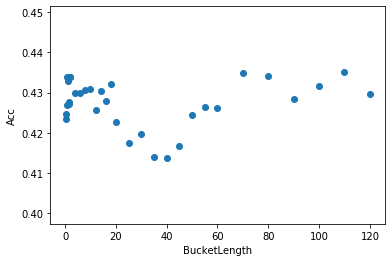

In [44]:
matplotlib.pyplot.scatter(np.unique(BucketLength), acc_score2)
plt.xlabel('BucketLength')
plt.ylabel('Acc')